([<matplotlib.axis.XTick at 0x7daf1bc96d10>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

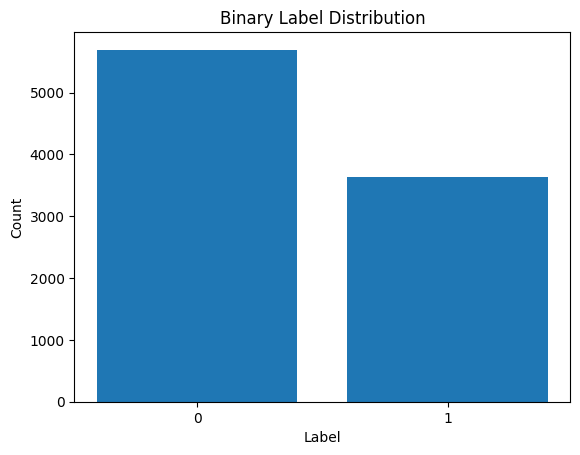

In [ ]:
import pandas as pd

data = pd.read_csv('train.csv')

## ====== ##

import matplotlib.pyplot as plt

label_counts = data['binary-label'].value_counts()

plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Binary Label Distribution')
plt.xticks([0, 1])  # 0과 1 레이블 표시

In [ ]:
import random
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet

# CSV 파일 읽기
df = pd.read_csv('train.csv')

# nltk 다운로드 (처음 한 번만 실행)
# import nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

def get_synonym(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))

def augment_sentence(sentence):
    words = word_tokenize(sentence)
    augmented_words = []

    for word in words:
        if random.random() < 0.3:  # 30% 확률로 단어를 대체
            synonyms = get_synonym(word)
            if synonyms:
                augmented_words.append(random.choice(synonyms))
            else:
                augmented_words.append(word)
        else:
            augmented_words.append(word)

    return ' '.join(augmented_words)

# binary-label이 1인 데이터 추출
positive_samples = df[df['binary-label'] == 1]

# 데이터 증강
augmented_samples = positive_samples.copy()
augmented_samples['sentence_1'] = augmented_samples['sentence_1'].apply(augment_sentence)
augmented_samples['sentence_2'] = augmented_samples['sentence_2'].apply(augment_sentence)

# 원본 데이터와 증강 데이터 결합
augmented_df = pd.concat([df, augmented_samples], ignore_index=True)

# 새로운 CSV 파일로 저장
augmented_df.to_csv('augmented_train.csv', index=False)

([<matplotlib.axis.XTick at 0x7daf05b07e80>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

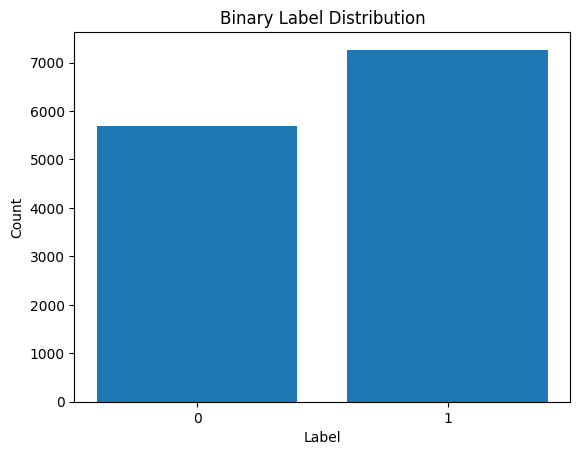

In [ ]:
data = pd.read_csv('augmented_train.csv')

## ====== ##

label_counts = data['binary-label'].value_counts()

plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Binary Label Distribution')
plt.xticks([0, 1])  # 0과 1 레이블 표시

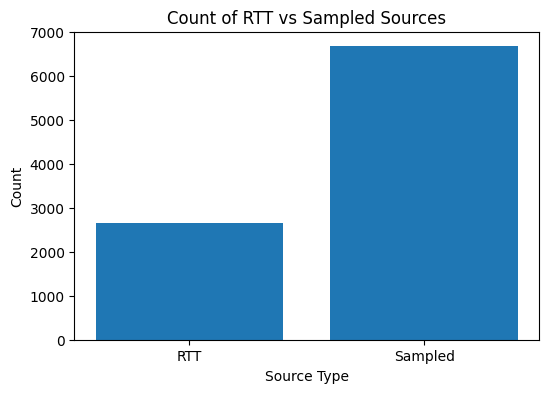

In [ ]:
# 'rtt'로 끝나는 source 개수 세기
rtt_count = df[df['source'].str.endswith('rtt')].shape[0]

# 'sampled'로 끝나는 source 개수 세기
sampled_count = df[df['source'].str.endswith('sampled')].shape[0]

# 시각화 (막대 그래프)
labels = ['RTT', 'Sampled']
counts = [rtt_count, sampled_count]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts)

# 그래프 제목 및 레이블 설정
plt.title('Count of RTT vs Sampled Sources')
plt.xlabel('Source Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# source가 -rtt인 데이터 추출
rtt_samples = df[df['source'].str.endswith('rtt')]

# 데이터 증강
augmented_samples_2 = rtt_samples.copy()
augmented_samples_2['sentence_1'] = augmented_samples['sentence_1'].apply(augment_sentence)
augmented_samples_2['sentence_2'] = augmented_samples['sentence_2'].apply(augment_sentence)

# 원본 데이터와 증강 데이터 결합
augmented_df_2 = pd.concat([df, augmented_samples_2], ignore_index=True)

# 새로운 CSV 파일로 저장
augmented_df_2.to_csv('augmented_train_2.csv', index=False)

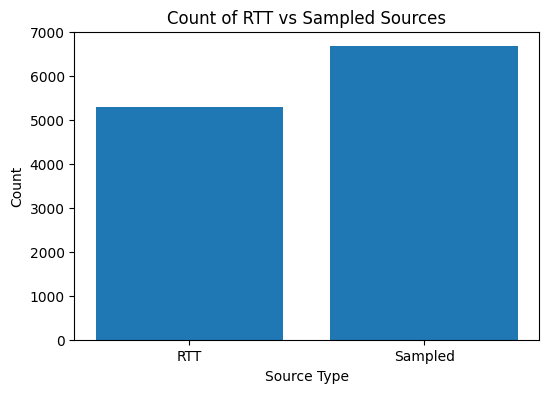

In [ ]:
data_2 = pd.read_csv('augmented_train_2.csv')



# 'rtt'로 끝나는 source 개수 세기
rtt_count = data_2[data_2['source'].str.endswith('rtt')].shape[0]

# 'sampled'로 끝나는 source 개수 세기
sampled_count = data_2[data_2['source'].str.endswith('sampled')].shape[0]

# 시각화 (막대 그래프)
labels = ['RTT', 'Sampled']
counts = [rtt_count, sampled_count]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts)

# 그래프 제목 및 레이블 설정
plt.title('Count of RTT vs Sampled Sources')
plt.xlabel('Source Type')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')
df = df[df['label'] != 0]

# sentence_1과 sentence_2만 교환한 새로운 데이터프레임 생성
df_swapped = df.copy()
df_swapped['sentence_1'], df_swapped['sentence_2'] = df['sentence_2'], df['sentence_1']

# 기존 데이터와 바꾼 데이터를 연결 (concat)
df_combined = pd.concat([df, df_swapped], ignore_index=True)

# 수정된 데이터프레임을 새 CSV 파일로 저장
df_combined.to_csv('combined_train.csv', index=False)

In [2]:
import pandas as pd

df = pd.read_csv('dev.csv')

# sentence_1과 sentence_2만 교환한 새로운 데이터프레임 생성
df_swapped = df.copy()
df_swapped['sentence_1'], df_swapped['sentence_2'] = df['sentence_2'], df['sentence_1']

# 기존 데이터와 바꾼 데이터를 연결 (concat)
df_combined = pd.concat([df, df_swapped], ignore_index=True)

# 수정된 데이터프레임을 새 CSV 파일로 저장
df_combined.to_csv('combined_dev_2.csv', index=False)

In [ ]:
import pandas as pd

df = pd.read_csv('combined_train.csv')
filtered_df = df[df['label'] != 0]

def remove_one_k(sentence):
    if sentence.count('ㅋ') >= 3:
        return sentence.replace('ㅋ', '', 1)  # 첫 번째 ㅋ를 하나만 제거
    return sentence

filtered_df = df[(df['sentence_1'].str.count('ㅋ') >= 3) | (df['sentence_2'].str.count('ㅋ') >= 3)].copy()

# ㅋ 하나 제거
filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(remove_one_k)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(remove_one_k)

# 기존 데이터프레임에 추가
updated_df = pd.concat([df, filtered_df]).drop_duplicates(keep=False).reset_index(drop=True)

updated_df.to_csv('updated_train.csv', index=False)

In [ ]:
import pandas as pd
import re

df = pd.read_csv('combined_train.csv')

def replace_k_pattern(sentence):
  return re.sub(r'ㅋ{3,}', 'ㅋㅋ', sentence)

filtered_df = df[(df['sentence_1'].str.count('ㅋ') >= 3) | (df['sentence_2'].str.count('ㅋ') >= 3)].copy()

filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(replace_k_pattern)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(replace_k_pattern)

# 기존 데이터프레임에 추가
updated_df = pd.concat([df, filtered_df]).drop_duplicates(keep=False).reset_index(drop=True)

updated_df.to_csv('replaced_train.csv', index=False)

In [ ]:
df = pd.read_csv('updated_train.csv')
filtered_df = df[df['label'] != 0]

def remove_one_k(sentence):
    if sentence.count('!') >= 3:
        return sentence.replace('!', '', 1)  # 첫 번째 !를 하나만 제거
    return sentence

filtered_df = df[(df['sentence_1'].str.count('!') >= 3) | (df['sentence_2'].str.count('!') >= 3)].copy()

# ! 하나 제거
filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(remove_one_k)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(remove_one_k)

# 기존 데이터프레임에 추가
updated_df = pd.concat([df, filtered_df]).drop_duplicates(keep=False).reset_index(drop=True)

updated_df.to_csv('updated_train_2.csv', index=False)

In [ ]:
df = pd.read_csv('combined_train.csv')
filtered_df = df[df['label'] != 0]

def remove_one_k(sentence):
    if sentence.count('!') >= 3:
        return sentence.replace('!', '', 1)  # 첫 번째 !를 하나만 제거
    return sentence

filtered_df = df[(df['sentence_1'].str.count('!') >= 3) | (df['sentence_2'].str.count('!') >= 3)].copy()

# ! 하나 제거
filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(remove_one_k)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(remove_one_k)

# 기존 데이터프레임에 추가
# updated_df = pd.concat([df, filtered_df]).drop_duplicates(keep=False).reset_index(drop=True)

filtered_df.to_csv('updated_train_3.csv', index=False)

In [ ]:
df = pd.read_csv('combined_train.csv')
filtered_df = df[df['label'] != 0]

def remove_one_k(sentence):
    if sentence.count('.') >= 3:
        return sentence.replace('.', '', 1)  # 첫 번째 !를 하나만 제거
    return sentence

filtered_df = df[(df['sentence_1'].str.count('.') >= 3) | (df['sentence_2'].str.count('.') >= 3)].copy()

# ! 하나 제거
filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(remove_one_k)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(remove_one_k)

# 기존 데이터프레임에 추가
# updated_df = pd.concat([df, filtered_df]).drop_duplicates(keep=False).reset_index(drop=True)

filtered_df.to_csv('updated_train_4.csv', index=False)

In [ ]:
df1 = pd.read_csv('updated_train.csv')
df2 = pd.read_csv('updated_train_3.csv')

# 두 DataFrame 합치기
merged_df = pd.concat([df1, df2], ignore_index=True)

# 결과를 새로운 CSV 파일로 저장
merged_df.to_csv('updated_train_5.csv', index=False)

In [ ]:
df1 = pd.read_csv('updated_train_5.csv')
df2 = pd.read_csv('updated_train_4.csv')

# 두 DataFrame 합치기
merged_df = pd.concat([df1, df2], ignore_index=True)

# 결과를 새로운 CSV 파일로 저장
merged_df.to_csv('updated_train_6.csv', index=False)

In [ ]:
import re

df = pd.read_csv('combined_train.csv')
filtered_df = df[df['label'] != 0]

def replace_k_pattern(sentence):
  return re.sub(r'다\.', '다', sentence)

filtered_df = df[(df['sentence_1'].str.endswith('다.')) | (df['sentence_2'].str.endswith('다.'))].copy()

filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(replace_k_pattern)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(replace_k_pattern)

filtered_df.to_csv('replaced_train_1.csv', index=False)

In [ ]:
df = pd.read_csv('combined_train.csv')
filtered_df = df[df['label'] != 0]

def replace_k_pattern(sentence):
  return re.sub(r'요\.', '요', sentence)

filtered_df = df[(df['sentence_1'].str.endswith('요.')) | (df['sentence_2'].str.endswith('요.'))].copy()

filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(replace_k_pattern)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(replace_k_pattern)

filtered_df.to_csv('replaced_train_2.csv', index=False)

In [ ]:
df1 = pd.read_csv('replaced_train_1.csv')
df2 = pd.read_csv('replaced_train_2.csv')

# 두 DataFrame 합치기
merged_df = pd.concat([df1, df2], ignore_index=True)

# 결과를 새로운 CSV 파일로 저장
merged_df.to_csv('replaced_train_3.csv', index=False)

In [ ]:
df1 = pd.read_csv('updated_train_6.csv')
df2 = pd.read_csv('replaced_train_3.csv')

# 두 DataFrame 합치기
merged_df = pd.concat([df1, df2], ignore_index=True)

# 결과를 새로운 CSV 파일로 저장
merged_df.to_csv('replaced_train_4.csv', index=False)

In [ ]:
import pandas as pd

df = pd.read_csv('combined_train.csv')

def remove_one_k(sentence):
    if sentence.count('ㅎ') >= 2:
        return sentence.replace('ㅎ', '', 1)  # 첫 번째 ㅎ를 하나만 제거
    return sentence

filtered_df = df[(df['sentence_1'].str.count('ㅎ') >= 2) | (df['sentence_2'].str.count('ㅎ') >= 2)].copy()

# ㅎ 하나 제거
filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(remove_one_k)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(remove_one_k)

filtered_df.to_csv('updated_train_7.csv', index=False)

In [ ]:
df1 = pd.read_csv('replaced_train_4.csv')
df2 = pd.read_csv('updated_train_7.csv')

# 두 DataFrame 합치기
merged_df = pd.concat([df1, df2], ignore_index=True)

# 결과를 새로운 CSV 파일로 저장
merged_df.to_csv('updated_train_8.csv', index=False)

In [ ]:
import pandas as pd

df = pd.read_csv('combined_train.csv')

def remove_one_k(sentence):
    if sentence.count('~') >= 2:
        return sentence.replace('~', '', 1)  # 첫 번째 ~를 하나만 제거
    return sentence

filtered_df = df[(df['sentence_1'].str.count('~') >= 2) | (df['sentence_2'].str.count('~') >= 2)].copy()

# ~ 하나 제거
filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(remove_one_k)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(remove_one_k)

filtered_df.to_csv('updated_train_9.csv', index=False)

In [ ]:
df1 = pd.read_csv('replaced_train_4.csv')
df2 = pd.read_csv('updated_train_9.csv')

# 두 DataFrame 합치기
merged_df = pd.concat([df1, df2], ignore_index=True)

# 결과를 새로운 CSV 파일로 저장
merged_df.to_csv('updated_train_10.csv', index=False)

In [ ]:
df1 = pd.read_csv('updated_train_8.csv')
df2 = pd.read_csv('updated_train_9.csv')

# 두 DataFrame 합치기
merged_df = pd.concat([df1, df2], ignore_index=True)

# 결과를 새로운 CSV 파일로 저장

In [ ]:
### . 4개 이상 -> .. 제거 ###

df = pd.read_csv('combined_train.csv')
filtered_df = df[df['label'] != 0]

# 중복된 점을 두 개 삭제하는 함수
def remove_extra_two_dots(text):
    return re.sub(r'\.{4,}', lambda x: x.group(0)[:-2], text) if isinstance(text, str) else text

# 점이 4개 이상인 문장 필터링 함수
def has_four_or_more_dots(text):
    return bool(re.search(r'\.{4,}', text)) if isinstance(text, str) else False

# s1, s2 컬럼에서 점이 4개 이상인 행들만 필터링
filtered_df = df[df['sentence_1'].apply(has_four_or_more_dots) | df['sentence_2'].apply(has_four_or_more_dots)].copy()

# 데이터프레임의 s1, s2 컬럼에서 점을 정리
filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(remove_extra_two_dots)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(remove_extra_two_dots)

# 결과를 CSV로 저장
filtered_df.to_csv('aug_train_1.csv', index=False)

In [ ]:
### ! 4개 이상 -> !! 제거 ###

df = pd.read_csv('combined_train.csv')
filtered_df = df[df['label'] != 0]

# 중복된 점을 두 개 삭제하는 함수
def remove_extra_two_dots(text):
    return re.sub(r'!{4,}', lambda x: x.group(0)[:-2], text) if isinstance(text, str) else text

# 점이 4개 이상인 문장 필터링 함수
def has_four_or_more_dots(text):
    return bool(re.search(r'!{4,}', text)) if isinstance(text, str) else False

# s1, s2 컬럼에서 점이 4개 이상인 행들만 필터링
filtered_df = df[df['sentence_1'].apply(has_four_or_more_dots) | df['sentence_2'].apply(has_four_or_more_dots)].copy()

# 데이터프레임의 s1, s2 컬럼에서 점을 정리
filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(remove_extra_two_dots)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(remove_extra_two_dots)

# filtered_df.head()

# 결과를 CSV로 저장
filtered_df.to_csv('aug_train_2.csv', index=False)

In [ ]:
### ㅎ 3개 이상 -> ㅎ 제거 ###

df = pd.read_csv('combined_train.csv')
filtered_df = df[df['label'] != 0]

def remove_one_k(sentence):
    if sentence.count('ㅎ') >= 3:
        return sentence.replace('ㅎ', '', 1)
    return sentence

filtered_df = df[(df['sentence_1'].str.count('ㅎ') >= 3) | (df['sentence_2'].str.count('ㅎ') >= 3)].copy()

# ㅋ 하나 제거
filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(remove_one_k)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(remove_one_k)

# filtered_df.head()

# 결과를 CSV로 저장
filtered_df.to_csv('aug_train_3.csv', index=False)

In [ ]:
### ? 2개 이상 -> ? 제거 ###

df = pd.read_csv('combined_train.csv')

def remove_one_k(sentence):
    if sentence.count('?') >= 2:
        return sentence.replace('?', '', 1)
    return sentence

filtered_df = df[(df['sentence_1'].str.count('\?') >= 2) | (df['sentence_2'].str.count('\?') >= 2)].copy()

# ㅋ 하나 제거
filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(remove_one_k)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(remove_one_k)

# filtered_df.head()

# 결과를 CSV로 저장
filtered_df.to_csv('aug_train_4.csv', index=False)

In [ ]:
### ; 2개 이상 -> ; 제거 ###

df = pd.read_csv('combined_train.csv')

def remove_one_k(sentence):
    if sentence.count(';') >= 2:
        return sentence.replace(';', '', 1)
    return sentence

filtered_df = df[(df['sentence_1'].str.count(';') >= 2) | (df['sentence_2'].str.count(';') >= 2)].copy()

# ㅋ 하나 제거
filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(remove_one_k)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(remove_one_k)

# filtered_df.head()

# 결과를 CSV로 저장
filtered_df.to_csv('aug_train_5.csv', index=False)

In [ ]:
### ' -> " ###
df = pd.read_csv('combined_train.csv')
filtered_df = df[df['label'] != 0]

def replace_k_pattern(sentence):
  return re.sub(r'\'', '\"', sentence)

filtered_df = df[(df['sentence_1'].str.endswith('\'')) | (df['sentence_2'].str.endswith('\''))].copy()

filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(replace_k_pattern)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(replace_k_pattern)

# filtered_df.head()

# 결과를 CSV로 저장
filtered_df.to_csv('aug_train_6.csv', index=False)

In [ ]:
### 1,2,3,6 ###

df1 = pd.read_csv('replaced_train_4.csv')
df2 = pd.read_csv('aug_train_1.csv')
df3 = pd.read_csv('aug_train_2.csv')
df4 = pd.read_csv('aug_train_3.csv')
df5 = pd.read_csv('aug_train_6.csv')

df_12 = pd.concat([df1, df2], ignore_index=True)
df_123 = pd.concat([df_12, df3], ignore_index=True)
df_1234 = pd.concat([df_123, df4], ignore_index=True)
df_12345 = pd.concat([df_1234, df5], ignore_index=True)

df_12345.to_csv('updated_train_12.csv', index=False)

In [ ]:
### ^^ -> ㅎㅎ ###

df = pd.read_csv('combined_train.csv')

def replace_k_pattern(sentence):
  return re.sub(r'\^\^', 'ㅎㅎ', sentence)

filtered_df = df[(df['sentence_1'].str.count('\^\^') >= 1) | (df['sentence_2'].str.count('\^\^') >= 1)].copy()

filtered_df['sentence_1'] = filtered_df['sentence_1'].apply(replace_k_pattern)
filtered_df['sentence_2'] = filtered_df['sentence_2'].apply(replace_k_pattern)

# filtered_df.head()

# 결과를 CSV로 저장
filtered_df.to_csv('aug_train_7.csv', index=False)

In [ ]:
### 1,2,3,6 ###

df1 = pd.read_csv('updated_train_12.csv')
df2 = pd.read_csv('aug_train_7.csv')

merged_df = pd.concat([df1, df2], ignore_index=True)

merged_df.to_csv('updated_train_13.csv', index=False)

In [ ]:
# nltk 다운로드 (처음 한 번만 실행)
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import random
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet

# CSV 파일 읽기
df = pd.read_csv('updated_train_12.csv')
filtered_df = df[df['label'] != 0]

def get_synonym(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))

def augment_sentence(sentence):
    words = word_tokenize(sentence)
    augmented_words = []

    for word in words:
        if random.random() < 0.3:  # 30% 확률로 단어를 대체
            synonyms = get_synonym(word)
            if synonyms:
                augmented_words.append(random.choice(synonyms))
            else:
                augmented_words.append(word)
        else:
            augmented_words.append(word)

    return ' '.join(augmented_words)

# 데이터 증강
augmented_samples = filtered_df.copy()
augmented_samples['sentence_1'] = augmented_samples['sentence_1'].apply(augment_sentence)
augmented_samples['sentence_2'] = augmented_samples['sentence_2'].apply(augment_sentence)

# 원본 데이터와 증강 데이터 결합
augmented_df = pd.concat([df, augmented_samples], ignore_index=True)

# 새로운 CSV 파일로 저장
augmented_df.to_csv('updated_train_15.csv', index=False)

In [ ]:
import pandas as pd
import random
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet

# CSV 파일 읽기
df = pd.read_csv('updated_dev_12.csv')
filtered_df = df[df['label'] != 0]

def get_synonym(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))

def augment_sentence(sentence):
    words = word_tokenize(sentence)
    augmented_words = []

    for word in words:
        if random.random() < 0.3:  # 30% 확률로 단어를 대체
            synonyms = get_synonym(word)
            if synonyms:
                augmented_words.append(random.choice(synonyms))
            else:
                augmented_words.append(word)
        else:
            augmented_words.append(word)

    return ' '.join(augmented_words)

# 데이터 증강
augmented_samples = filtered_df.copy()
augmented_samples['sentence_1'] = augmented_samples['sentence_1'].apply(augment_sentence)
augmented_samples['sentence_2'] = augmented_samples['sentence_2'].apply(augment_sentence)

# 원본 데이터와 증강 데이터 결합
augmented_df = pd.concat([df, augmented_samples], ignore_index=True)

# 새로운 CSV 파일로 저장
augmented_df.to_csv('updated_dev_15.csv', index=False)